# **Objective**:
Build a movie recommendation system using
collaborative filtering and machine learning techniques in Python.


1.   **Dataset**: The project utilizes two CSV files, one containing user ratings for movies and another containing movie titles.The project utilizes two CSV files, one containing user ratings for movies and another containing movie titles
2.   **Data Merge**: The dataset and movie titles CSV files are merged to create a unified dataset for analysis.
3.   **User Data**: The dataset includes user IDs and the movies they have watched, providing insights into user preferences.

# **Approach**



> *User-Based Collaborative Filtering:*



 This approach recommends items that similar users have liked in the past. It calculates the similarity between users based on their ratings for different items and recommends items that similar users have rated highly.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Bharat Intern/Task 2/Dataset.csv')
movie_title = pd.read_csv('/content/drive/MyDrive/Bharat Intern/Task 2/Movie_Id_Titles.csv')

# Print the first few rows of the dataset
print(dataset.head())

# Print the first few rows of the movie_title dataset
print(movie_title.head())


   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742
   item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)


In [15]:
#combining data

data = pd.merge(dataset, movie_title, on='item_id')

# Print the first few rows of the merged data
print(data.head())


   user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)


In [16]:
data.shape

(100003, 5)

In [17]:
import pandas as pd

# Calculate the range of ratings in the dataset
max_rating = data['rating'].max()
min_rating = data['rating'].min()

# Print the range of ratings
print(f"Highest rating: {max_rating}")
print(f"Lowest rating: {min_rating}")


# get rating count
data_rating = dict(data['rating'].value_counts())
data_rating

Highest rating: 5
Lowest rating: 1


{4: 34174, 3: 27145, 5: 21203, 2: 11370, 1: 6111}

In [18]:

from collections import Counter
# Calculate the mean, mode, and median of the ratings
mean_rating = data['rating'].mean()
mode_rating = Counter(data['rating']).most_common(1)[0][0]
median_rating = data['rating'].median()

# Print the results
print(f"Mean rating: {mean_rating}")
print(f"Mode rating: {mode_rating}")
print(f"Median rating: {median_rating}")


Mean rating: 3.5298641040768777
Mode rating: 4
Median rating: 4.0


In [19]:
# prompt: provide mean mode median of every num feature

# Get the numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Calculate the mean, mode, and median for each numerical feature
for feature in numerical_features:
  mean = numerical_features[feature].mean()
  mode = Counter(numerical_features[feature]).most_common(1)[0][0]
  median = numerical_features[feature].median()
  print(f"Feature: {feature}")
  print(f"Mean: {mean}")
  print(f"Mode: {mode}")
  print(f"Median: {median}")
  print("\n")


Feature: user_id
Mean: 462.4708758737238
Mode: 405
Median: 447.0


Feature: item_id
Mean: 425.5209143725688
Mode: 50
Median: 322.0


Feature: rating
Mean: 3.5298641040768777
Mode: 4
Median: 4.0


Feature: timestamp
Mean: 883528783.1535954
Mode: 891033606
Median: 882826944.0




In [20]:
#covariance matrix of every num feature in between 0 to 1

import numpy as np

# Get the numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Calculate the covariance matrix
covariance_matrix = numerical_features.cov()

# Normalize the covariance matrix to be between 0 and 1
normalized_covariance_matrix = (covariance_matrix - covariance_matrix.min()) / (covariance_matrix.max() - covariance_matrix.min())

# Print the normalized covariance matrix
print(normalized_covariance_matrix)


            user_id   item_id    rating     timestamp
user_id    0.002612  0.000013  0.999943  9.556450e-07
item_id    0.000034  0.001479  0.999007  2.594898e-06
rating     0.000000  0.000000  1.000000  0.000000e+00
timestamp  1.000000  1.000000  0.000000  1.000000e+00


<Axes: title={'center': 'Rating Count'}>

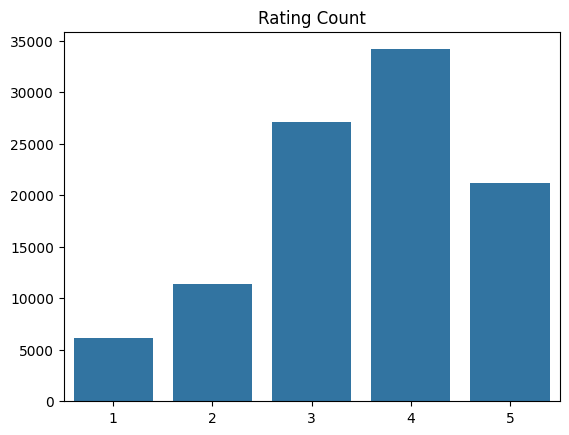

In [21]:
#visualisation on the basis of rating

import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for visualization
x = list(data_rating.keys())
y = list(data_rating.values())

# Create a bar plot
# plt.figure(figsize=(5, 6))
plt.title('Rating Count')
sns.barplot(x=x, y=y)

# Display the plot
# plt.show()


In [22]:
# prompt: get all num data in new dataframe name as new_dtf

new_dtf = data.select_dtypes(include=["int64", "float64"])


In [23]:
# prompt: apply pca 2 gwt all new_dtf into 2 features

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_dtf = pca.fit_transform(new_dtf)


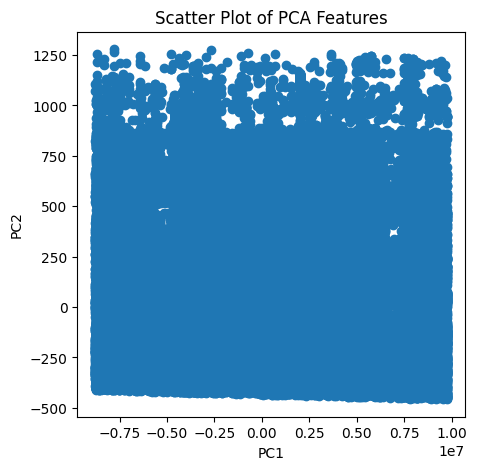

In [24]:
# prompt: plot new_dtf in reduced size

plt.figure(figsize=(5, 5))
plt.scatter(new_dtf[:, 0], new_dtf[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PCA Features')
plt.show()


In [25]:

# Create a dictionary to store the average rating and count for each movie
average_rating = {}
count_rating = {}

# Loop through each unique movie title
for title in data['title'].unique():
  # Calculate the average rating for the movie
  average_rating[title] = data[data['title'] == title]['rating'].mean()

  # Count the number of ratings for the movie
  count_rating[title] = data[data['title'] == title]['rating'].count()

# Print the average rating and count for each movie
for title, avg_rating in average_rating.items():
  print(f"{title}: Average rating: {avg_rating:.2f}, Rating count: {count_rating[title]}")


Star Wars (1977): Average rating: 4.36, Rating count: 584
Empire Strikes Back, The (1980): Average rating: 4.21, Rating count: 368
Gone with the Wind (1939): Average rating: 3.85, Rating count: 172
Kolya (1996): Average rating: 3.99, Rating count: 117
L.A. Confidential (1997): Average rating: 4.16, Rating count: 297
Heavyweights (1994): Average rating: 2.15, Rating count: 13
Legends of the Fall (1994): Average rating: 3.46, Rating count: 81
Jackie Brown (1997): Average rating: 3.64, Rating count: 126
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963): Average rating: 4.25, Rating count: 194
Hunt for Red October, The (1990): Average rating: 3.86, Rating count: 227
Jungle Book, The (1994): Average rating: 3.56, Rating count: 85
Grease (1978): Average rating: 3.35, Rating count: 170
Remains of the Day, The (1993): Average rating: 3.94, Rating count: 150
Men in Black (1997): Average rating: 3.75, Rating count: 303
Romy and Michele's High School Reunion (1997): Aver

In [26]:


# Create a new DataFrame with the average rating and count for each movie
data_average = pd.DataFrame({
  'title': data['title'].unique(),
  'average_rating': [average_rating[title] for title in data['title'].unique()],
  'count_rating': [count_rating[title] for title in data['title'].unique()]
})

# Print the first few rows of the new DataFrame
print(data_average.head())


                             title  average_rating  count_rating
0                 Star Wars (1977)        4.359589           584
1  Empire Strikes Back, The (1980)        4.206522           368
2        Gone with the Wind (1939)        3.854651           172
3                     Kolya (1996)        3.991453           117
4         L.A. Confidential (1997)        4.161616           297


In [27]:
#combining data

newdata = pd.merge(data, data_average, on='title')
data_average = newdata
print(data_average)



        user_id  item_id  rating  timestamp  \
0             0       50       5  881250949   
1           290       50       5  880473582   
2            79       50       4  891271545   
3             2       50       5  888552084   
4             8       50       5  879362124   
...         ...      ...     ...        ...   
99998       840     1674       4  891211682   
99999       655     1640       3  888474646   
100000      655     1637       3  888984255   
100001      655     1630       3  887428735   
100002      655     1641       3  887427810   

                                                    title  average_rating  \
0                                        Star Wars (1977)        4.359589   
1                                        Star Wars (1977)        4.359589   
2                                        Star Wars (1977)        4.359589   
3                                        Star Wars (1977)        4.359589   
4                                        Star Wars

In [28]:
C = data_average['average_rating'].mean()
M = data_average['count_rating'].quantile(0.50)

# now using formulae to get score for each movies based on rating

# Score = ( average_rating - ['average_rating'].mean() )*count_rating


qualified_movies = data_average.copy().loc[data_average['count_rating'] >=M]
qualified_movies['score'] = qualified_movies.apply(lambda x: (x['average_rating'] - C) * x['count_rating'], axis=1)
qualified_movies = qualified_movies.sort_values('score', ascending=False)

print('Movies with score > 0:')
print(qualified_movies.head(100))

print('Movies with score < 0:')
print(qualified_movies.tail(100))

print(qualified_movies)


Movies with score > 0:
     user_id  item_id  rating  timestamp             title  average_rating  \
0          0       50       5  881250949  Star Wars (1977)        4.359589   
402      869       50       4  884490892  Star Wars (1977)        4.359589   
386      871       50       5  888193275  Star Wars (1977)        4.359589   
387       44       50       5  878341246  Star Wars (1977)        4.359589   
388      831       50       5  891354900  Star Wars (1977)        4.359589   
..       ...      ...     ...        ...               ...             ...   
295       13       50       5  882140001  Star Wars (1977)        4.359589   
296      593       50       4  875660009  Star Wars (1977)        4.359589   
297      708       50       5  877325186  Star Wars (1977)        4.359589   
298      373       50       5  877098678  Star Wars (1977)        4.359589   
299       55       50       4  878176005  Star Wars (1977)        4.359589   

     count_rating       score  
0       

In [29]:

print(len(qualified_movies['title'].unique()))


214


**IMDB**


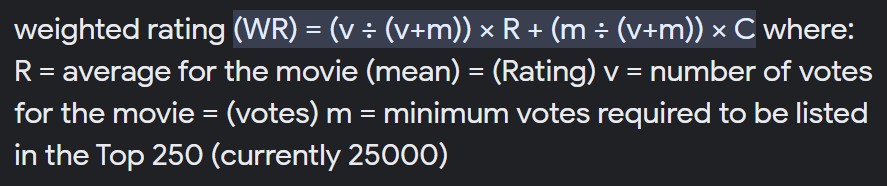

In [30]:
def weighted_rating(x, M=M, C=C):
    v = x['count_rating']
    R = x['average_rating']
    # Calculation based on the IMDB formula
    return (v/(v+M) * R) + (M/(M+v) * C)

qualified_movies['score2'] = qualified_movies.apply(weighted_rating, axis=1)
qualified_movies = qualified_movies.sort_values('score2', ascending=False)


print(qualified_movies)


       user_id  item_id  rating  timestamp                        title  \
0            0       50       5  881250949             Star Wars (1977)   
35          48       50       4  879434723             Star Wars (1977)   
17         124       50       3  890287508             Star Wars (1977)   
8          305       50       5  886321799             Star Wars (1977)   
2           79       50       4  891271545             Star Wars (1977)   
...        ...      ...     ...        ...                          ...   
49246      487      259       2  883441083  George of the Jungle (1997)   
49244      871      259       3  888192971  George of the Jungle (1997)   
49243      601      259       1  876346515  George of the Jungle (1997)   
49242      813      259       2  883752528  George of the Jungle (1997)   
49208       40      259       2  889041643  George of the Jungle (1997)   

       average_rating  count_rating       score    score2  
0            4.359589           584  48

In [31]:
print(len(qualified_movies['title'].unique()))
print(qualified_movies)

214
       user_id  item_id  rating  timestamp                        title  \
0            0       50       5  881250949             Star Wars (1977)   
35          48       50       4  879434723             Star Wars (1977)   
17         124       50       3  890287508             Star Wars (1977)   
8          305       50       5  886321799             Star Wars (1977)   
2           79       50       4  891271545             Star Wars (1977)   
...        ...      ...     ...        ...                          ...   
49246      487      259       2  883441083  George of the Jungle (1997)   
49244      871      259       3  888192971  George of the Jungle (1997)   
49243      601      259       1  876346515  George of the Jungle (1997)   
49242      813      259       2  883752528  George of the Jungle (1997)   
49208       40      259       2  889041643  George of the Jungle (1997)   

       average_rating  count_rating       score    score2  
0            4.359589           584

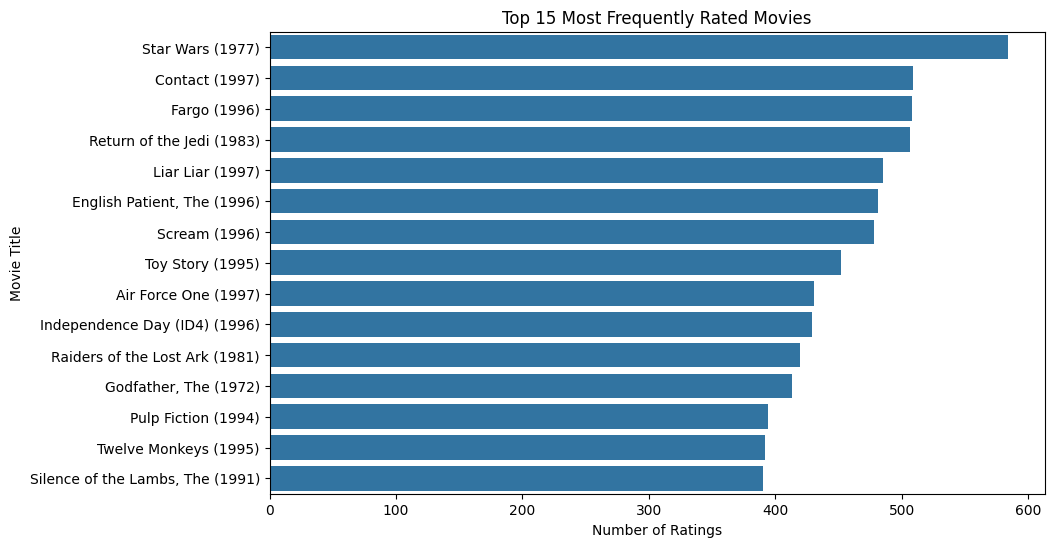

In [32]:

# Get the top 15 most frequently rated movies
tmp_d = qualified_movies['title'].value_counts()[:15]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=tmp_d.index, x=tmp_d.values)

# Set the title and labels
plt.title('Top 15 Most Frequently Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')



# Display the plot
plt.show()


In [33]:
movie_rate = data.pivot_table(index = 'user_id' ,columns = 'title' , values ='rating')
movie_rate.fillna(0 , inplace = True)

movie_rate.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df = pd.DataFrame()
df['count_rating'] = pd.DataFrame(data.groupby('title')['rating'].count())

In [35]:
def get_recommendations(title, min_rating_count= 75):
    # Get user ratings for the input movie title
    user_ratings = movie_rate[title]

    # Calculate correlation of the input movie with all other movies
    similar_movies = movie_rate.corrwith(user_ratings)

    # Create a DataFrame with correlation values and movie titles
    corr_movies = pd.DataFrame(similar_movies, columns=['correlation'])

    # Remove any NaN values from the DataFrame
    corr_movies.dropna(inplace=True)

    # Join the DataFrame with the count of ratings for each movie
    corr_movies = corr_movies.join(df['count_rating'], how='left')

    # Filter out movies with fewer than min_rating_count ratings
    final_recommendations = corr_movies[corr_movies['count_rating'] > min_rating_count].sort_values('correlation', ascending=False)

    return final_recommendations


In [36]:
recommended = get_recommendations('12 Angry Men (1957)')
recommended.head(50)

,correlation,count_rating
title,,
12 Angry Men (1957),1.000000,125
"Bridge on the River Kwai, The (1957)",0.398266,165
Breakfast at Tiffany's (1961),0.371515,95
"Graduate, The (1967)",0.363852,239
It Happened One Night (1934),0.361479,81
North by Northwest (1959),0.358297,179
M*A*S*H (1970),0.354039,206
"Treasure of the Sierra Madre, The (1948)",0.353009,80
Amadeus (1984),0.347182,276


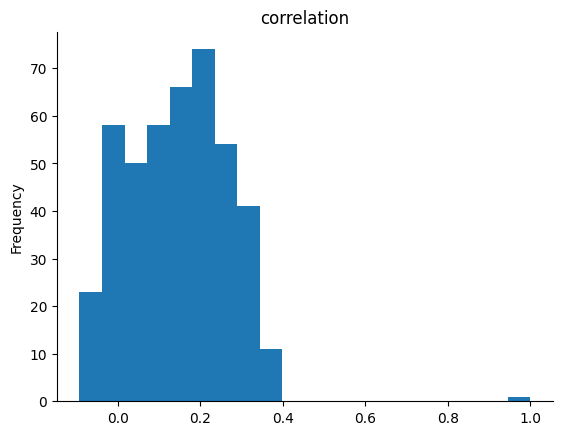

In [37]:
# @title correlation

from matplotlib import pyplot as plt
recommended['correlation'].plot(kind='hist', bins=20, title='correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
#train a linear regression model and predict accuracy on rating

from sklearn.linear_model import LinearRegression

# Separate features and target
X = qualified_movies[['count_rating', 'average_rating']]
y = qualified_movies['score2']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict on the training data
y_pred = model.predict(X)

# Calculate the accuracy
accuracy = model.score(X, y)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9858042737856735
